# Init

# Modules

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#  Fonctions

In [3]:
def highlight_last_max(data, colormax='antiquewhite', colormaxlast='lightgreen'):
    """
    A function that colour high value by rows
    
    Arguments:
        
    Returns:
      dataframe 
  """
    colormax_attr = f'background-color: {colormax}'
    colormaxlast_attr = f'background-color: {colormaxlast}'
    max_value = data.max()
    is_max = [colormax_attr if v == max_value else '' for v in data]
    is_max[len(data) - list(reversed(data)).index(max_value) -  1] = colormaxlast_attr
    return is_max

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def pareto_plot(data, index,  quantitative_column):
    """
    A function for pareto analyis
    
    Arguments:
    data- dataframe with information by customer
    index-  customers
    quantitative_column -  column to compute cumulative percentage
        
    Returns:
      a plot
  """
    
    df = data
    df = df.sort_values(by=quantitative_column,ascending=False)
    df["cumpercentage"] = df[quantitative_column].cumsum()/df[quantitative_column].sum()*100

    # Set figure and axis
    fig, ax = plt.subplots(figsize=(12,8))

    # Plot bars (i.e. frequencies)
    ax.bar(df.customer_Id, df[quantitative_column], color="C0")
    ax.set_title("Pareto Chart")
    ax.set_xlabel("Customer")
    ax.set_ylabel("Sales");

    # Second y axis (i.e. cumulative percentage)
    ax2 = ax.twinx()
    ax2.plot(df.customer_Id, df["cumpercentage"], color="C1", marker="D", ms=7)
    ax2.axhline(80, color="orange", linestyle="dashed")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.set_ylabel("Cumulative Percentage")


    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.show()

# Chargement des données

In [5]:
df_transaction = pd.read_csv('input/Transactions.csv', low_memory=False)
df_transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [6]:
df_prod_cat= pd.read_csv('input/prod_cat_info.csv', low_memory=False)
df_prod_cat.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [7]:
df_customer = pd.read_csv('input/Customer.csv', low_memory=False)
df_customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [8]:
df_temp= pd.merge(df_prod_cat, df_transaction, left_on=['prod_cat_code','prod_sub_cat_code'], right_on = ['prod_cat_code','prod_subcat_code'])
df_temp.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type
0,1,Clothing,4,Mens,28396777609,269101,19-02-2014,4,4,1386,582.12,6126.12,TeleShop
1,1,Clothing,4,Mens,58956348529,272484,18-02-2014,4,4,1443,606.06,6378.06,TeleShop
2,1,Clothing,4,Mens,83498320600,273359,18-02-2014,4,4,861,361.62,3805.62,e-Shop
3,1,Clothing,4,Mens,78091789730,271030,18-02-2014,4,1,380,39.90,419.90,e-Shop
4,1,Clothing,4,Mens,83108241933,273896,16-02-2014,4,2,574,120.54,1268.54,e-Shop


In [9]:
groupedvalues1=df_temp.groupby('prod_cat').\
    sum()['total_amt'].\
    reset_index().\
    sort_values(by='total_amt',ascending=False)

<AxesSubplot:xlabel='prod_cat', ylabel='total_amt'>

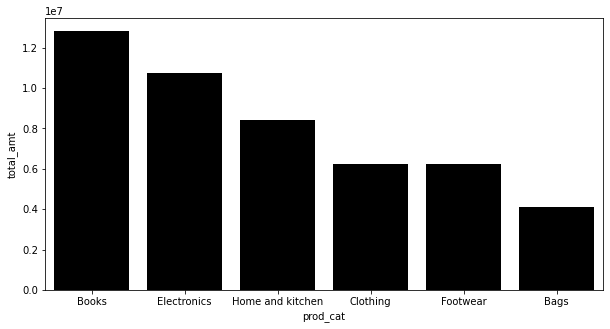

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='prod_cat',y='total_amt',data=groupedvalues1,color="black")

## Top performing channel

In [11]:
groupedvalues2=df_temp.groupby('Store_type').\
    sum()['total_amt'].\
    reset_index().\
    sort_values(by='total_amt',ascending=False)

<AxesSubplot:xlabel='Store_type', ylabel='total_amt'>

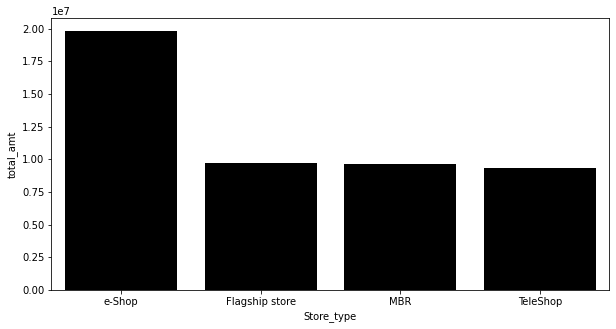

In [12]:
plt.figure(figsize=(10,5))

sns.barplot(x='Store_type',y='total_amt',data=groupedvalues2,color="black")

## Pairwise performing

In [13]:
# pivot the table
df_temp_to_colour=df_temp.pivot_table(values='total_amt',
                    index='prod_cat',
                    columns='Store_type',
                     aggfunc='sum',    
                 )

# columns high value
df_temp_to_colour.style.apply(highlight_last_max,axis=1)

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835000,848678.675000,789181.055000,1616300.075000
Books,2488205.850000,2496039.195000,2545005.060000,5293443.935000
Clothing,1194423.230000,1287686.335000,1241834.360000,2527193.565000
Electronics,2215136.040000,2107514.565000,1973338.835000,4426474.195000
Footwear,1234806.560000,1112163.715000,1235719.290000,2637084.710000
Home and kitchen,1712567.675000,1822403.570000,1579702.475000,3324319.570000


In [14]:
#ventes  moyennes par canal et product
df_temp_to_colour=df_temp.pivot_table(values='total_amt',
                    index='prod_cat',
                    columns='Store_type',
                     aggfunc='mean',    
                 )

df_temp_to_colour.style.apply(highlight_last_max,axis=1)

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,2237.914743,2030.331758,1924.831841,2069.526344
Books,2034.510098,2039.247708,2165.961753,2163.238224
Clothing,2045.245257,2057.006925,2155.962431,2152.635064
Electronics,2224.032169,2211.452849,2079.387603,2213.237098
Footwear,2151.230941,1826.212997,2062.970434,2166.873221
Home and kitchen,2111.674075,2193.024753,1987.047138,1964.727878


# PARETO ANALYIS

In [15]:
# Pays disponibles
df_temp2= pd.merge(df_customer, df_temp, left_on=['customer_Id'], right_on = ['cust_id'])
df_temp2.head()

,customer_Id,DOB,Gender,city_code,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,1,Clothing,1,Women,63314547725,268408,26-04-2012,1,1,806,84.630,890.630,Flagship store
1,268408,02-01-1970,M,4.0,2,Footwear,1,Mens,56844530655,268408,14-10-2012,1,5,1175,616.875,6491.875,MBR
2,268408,02-01-1970,M,4.0,2,Footwear,4,Kids,64633435931,268408,6/5/2013,4,3,312,98.280,1034.280,Flagship store
3,268408,02-01-1970,M,4.0,3,Electronics,9,Cameras,56902862040,268408,30-01-2013,9,5,868,455.700,4795.700,e-Shop
4,268408,02-01-1970,M,4.0,3,Electronics,10,Audio and video,19516063887,268408,7/9/2012,10,4,650,273.000,2873.000,e-Shop


In [16]:
df_temp2['customer_Id'].apply(str)
df_all_cust=df_temp2.groupby('customer_Id').\
    sum()['total_amt'].\
    reset_index().\
    sort_values(by='total_amt',ascending=False)

#why sum customer have negative value of sales?
# let's remove them (there are 84 customers
df_all_cust.shape[0]-df_all_cust[df_all_cust.total_amt>0].shape[0]

84

In [17]:
df_all_cust.customer_Id=df_all_cust.customer_Id.astype("str")
#df_all_cust=df_all_cust.drop('customer_Id',axis=1)
df_all_cust=df_all_cust[df_all_cust.total_amt>0]
#df.index = df_all_cust.customer_Id

## PARETO ANALYIS

The Pareto Principle is very simple, yet very important. 
It is named after Italian economist Vilfredo Pareto, who, in 1906, found that 80% of the land in Italy was owned by 20% of the population.

What was most important about Pareto’s finding was that this 80/20 distribution occurs extremely frequently. For example, in general, 20% of your customers represent 80% of your sales. And 20% of your time produces 80% of your results.
Here, let's try others approch : cumulative  sales for 20% 40% 60% 80%

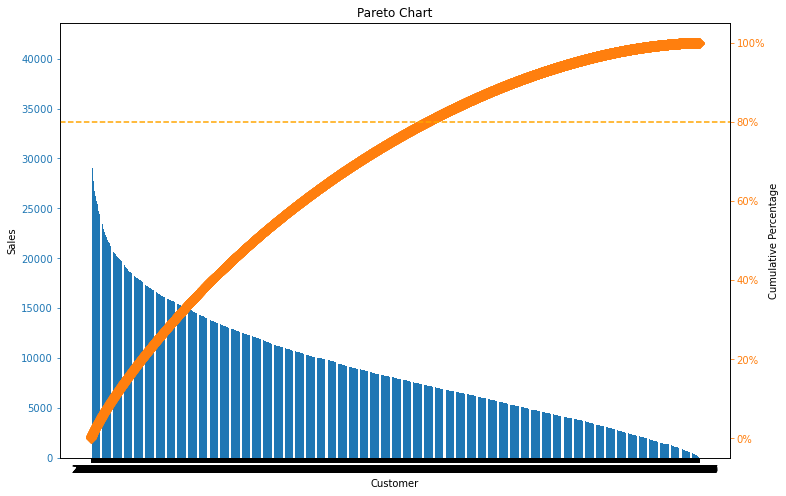

In [18]:
pareto_plot(df_all_cust, "customer_Id",  "total_amt")

## To go further

In [19]:
df_all_cust= df_all_cust.sort_values(by='total_amt',ascending=False)
df_all_cust['cumul']=df_all_cust['total_amt'].cumsum()

threshold80 = df_all_cust["total_amt"].sum() * 0.80
df_CustomerPer80 = df_all_cust[df_all_cust['cumul'] <= threshold80]

threshold50 = df_all_cust["total_amt"].sum() * 0.50
df_CustomerPer50 = df_all_cust[df_all_cust['cumul'] <= threshold50]
df_CustomerPer50

,customer_Id,total_amt,cumul
3276,271834,41510.430,4.151043e+04
4110,273140,35861.670,7.737210e+04
3604,272354,33954.440,1.113265e+05
413,267419,33828.470,1.451550e+05
5288,274948,33158.840,1.783139e+05
...,...,...,...
984,268328,12134.005,2.426611e+07
4404,273583,12132.900,2.427825e+07
2909,271279,12132.900,2.429038e+07
47,266854,12130.690,2.430251e+07


In [20]:
df_temp2.cust_id=df_temp2.cust_id.astype("str")
# list of our golden customers
golden_customer=df_CustomerPer50['customer_Id'].to_list()
full_data_50=df_temp2[df_temp2['cust_id'].isin(golden_customer)]

In [21]:
# ventes en myenne par les meilleurs cliens
df_temp_to_colour=full_data_50.pivot_table(values='total_amt',
                    index='prod_cat',
                    columns='Store_type',
                     aggfunc='mean',    
                 )

df_temp_to_colour.style.apply(highlight_last_max,axis=1)

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,2813.799444,2670.254026,2522.913138,3083.481324
Books,2658.423899,2530.802857,2990.828677,2940.895711
Clothing,2744.477245,2637.816948,3053.992945,3038.828387
Electronics,2913.369909,2881.954524,2732.461782,2904.577117
Footwear,2725.234650,2406.445979,2605.590000,2925.817143
Home and kitchen,2788.327096,2849.193909,2594.954375,2695.241600


In [22]:
full_data_50.pivot_table(values='total_amt',
                    index='Gender',
                     aggfunc='mean',    
                 )

,total_amt
Gender,
F,2837.242799
M,2783.451446


In [23]:
full_data_50.pivot_table(values='total_amt',
                    index='Gender',
                     aggfunc='sum',    
                 )

,total_amt
Gender,
F,11729161.73
M,12570066.73


In [24]:
 # date ware not parse as well. SOMETIMES with / or -
full_data_50['tran_date']=full_data_50['tran_date'].str.replace('/','-',)
full_data_50['tran_date']=pd.to_datetime(full_data_50['tran_date'], format='%d-%m-%Y')
full_data_50['DOB']=pd.to_datetime(full_data_50['DOB'], format='%d-%m-%Y')

In [25]:
# derniere date de transaction
full_data_50['max_transaction']=full_data_50.groupby(['cust_id',full_data_50.tran_date])['tran_date'].transform(max)
full_data_50['duree']=full_data_50['max_transaction'].dt.year-full_data_50['DOB'].dt.year
full_data_50

,customer_Id,DOB,Gender,city_code,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type,max_transaction,duree
0,268408,1970-01-02,M,4.0,1,Clothing,1,Women,63314547725,268408,2012-04-26,1,1,806,84.630,890.630,Flagship store,2012-04-26,42
1,268408,1970-01-02,M,4.0,2,Footwear,1,Mens,56844530655,268408,2012-10-14,1,5,1175,616.875,6491.875,MBR,2012-10-14,42
2,268408,1970-01-02,M,4.0,2,Footwear,4,Kids,64633435931,268408,2013-05-06,4,3,312,98.280,1034.280,Flagship store,2013-05-06,43
3,268408,1970-01-02,M,4.0,3,Electronics,9,Cameras,56902862040,268408,2013-01-30,9,5,868,455.700,4795.700,e-Shop,2013-01-30,43
4,268408,1970-01-02,M,4.0,3,Electronics,10,Audio and video,19516063887,268408,2012-09-07,10,4,650,273.000,2873.000,e-Shop,2012-09-07,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23043,270476,1992-12-25,F,3.0,2,Footwear,4,Kids,22883386455,270476,2012-05-22,4,4,898,377.160,3969.160,Flagship store,2012-05-22,20
23044,270476,1992-12-25,F,3.0,3,Electronics,5,Computers,85475160771,270476,2011-08-09,5,5,1354,710.850,7480.850,Flagship store,2011-08-09,19
23045,270476,1992-12-25,F,3.0,3,Electronics,10,Audio and video,3359888057,270476,2013-03-16,10,4,361,151.620,1595.620,MBR,2013-03-16,21
23046,270476,1992-12-25,F,3.0,4,Bags,4,Women,19725194268,270476,2012-02-21,4,4,618,259.560,2731.560,e-Shop,2012-02-21,20


array([[<AxesSubplot:title={'center':'nombre_trans'}>]], dtype=object)

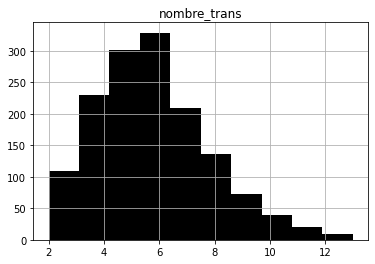

In [26]:
# compter les transactions par clients
nombre_tran=full_data_50.groupby(['cust_id',full_data_50.tran_date]).\
    count()['transaction_id'].\
    reset_index().\
    groupby('cust_id').\
    sum().\
    rename(columns={'transaction_id':'nombre_trans'})
nombre_tran.hist(color="black")

In [29]:
df_temp2.to_pickle('intermed/sales.sav')